# IRIS FLOWER CLASSIFICATION

##### Author: Immaculata Chiamaka Lughas

# Importing Essential Libraries for the Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as mplt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
iris_project = pd.read_csv('IRIS.csv')

In [3]:
# calls the variable
iris_project

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratory Data Analysis

In [4]:
# Checks information aboutthe  dataset
iris_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Statistical Analysis
iris_project.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Prints the first five rows
iris_project.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Prints the last five rows
iris_project.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
# Prints the sum of missing values
iris_project.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
# Counts the number of occurence of each value
iris_project['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
# Checks for the unique values
iris_project['sepal_length'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [11]:
# Counts the number of occurence of each value
spl = iris_project['sepal_length'].value_counts()
print(spl.max())

10


In [12]:
# Counts the number of occurence of each value
spw = iris_project['sepal_width'].value_counts()
print(spw.max())
print(spw.min())

26
1


In [13]:
# Counts the number of occurence of each value
pl = iris_project['petal_length'].value_counts()
print(pl.max())

14


In [14]:
# Counts the number of occurence of each value
pw = iris_project['petal_width'].value_counts()
print(pw.max())

28


# Data Visualization

In [15]:
# Sets the default style for seaborn plots
sn.set()

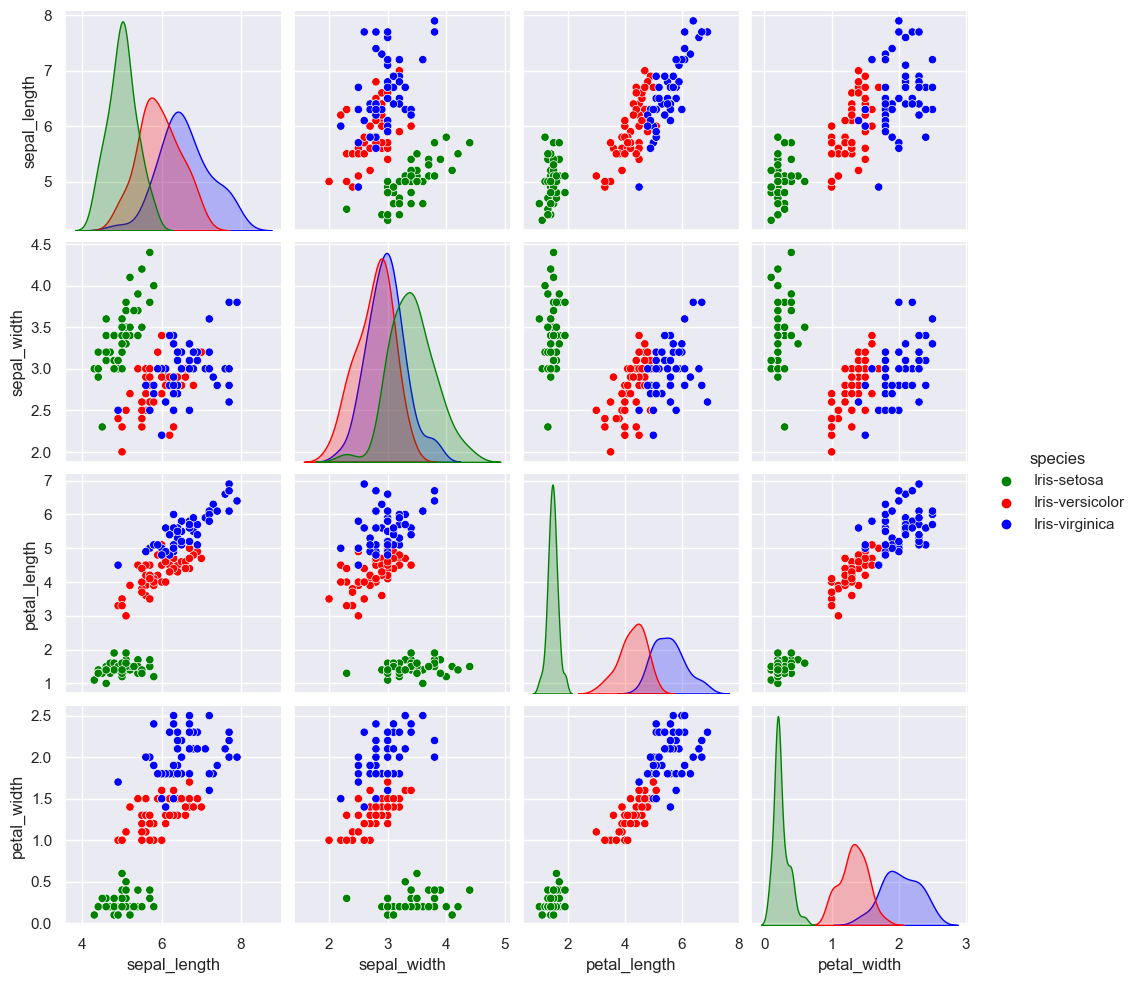

In [16]:
# A graphical representation of the species against all features
sn.pairplot(hue='species', data= iris_project, 
            palette = ["green", "red", 'blue'])
mplt.show()

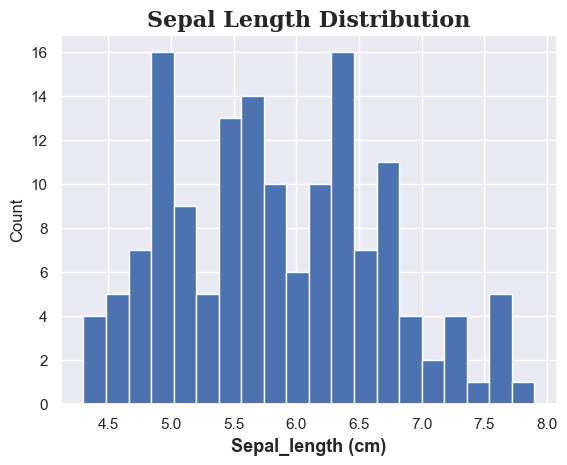

In [17]:
#  Visualizes the distribution of Sepal length
iris_project['sepal_length'].plot(kind='hist', bins=20)
sn.set_palette('Set1')
mplt.xlabel('Sepal_length (cm)', fontdict={'size': 13, 'weight': 'bold'})
mplt.ylabel('Count')
mplt.title('Sepal Length Distribution',
fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
mplt.show()

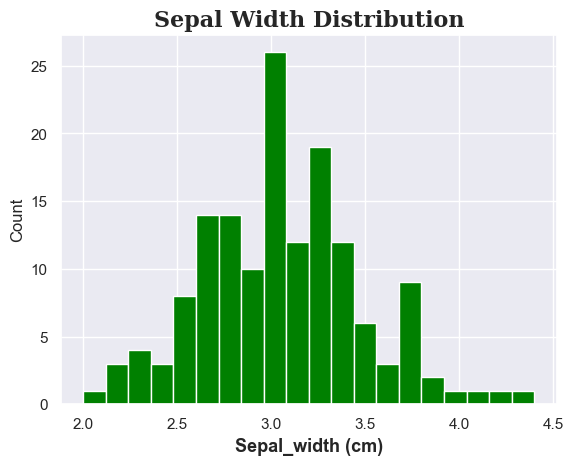

In [18]:
#  Visualizes the distribution of Sepal width
iris_project['sepal_width'].plot(kind='hist', bins=20,color= 'green')
mplt.xlabel('Sepal_width (cm)', fontdict={'size': 13, 'weight': 'bold'})
mplt.ylabel('Count')
mplt.title('Sepal Width Distribution',
           fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
mplt.show()

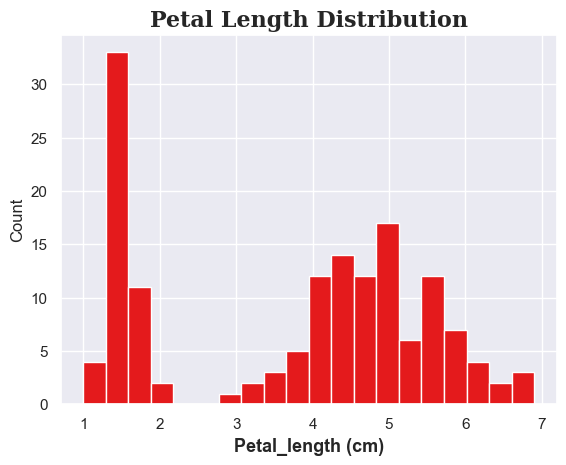

In [19]:
#  Visualizes the distribution of Petal length
iris_project['petal_length'].plot(kind='hist', bins=20)
sn.set_palette('Set1')
mplt.xlabel('Petal_length (cm)', fontdict={'size': 13, 'weight': 'bold'})
mplt.ylabel('Count')
mplt.title('Petal Length Distribution',
fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
mplt.show()

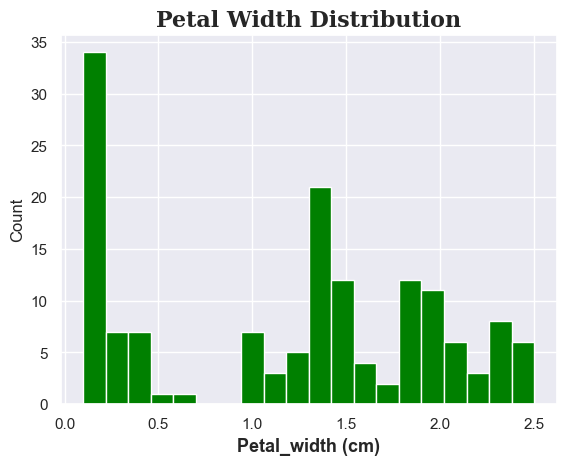

In [20]:
#  Visualizes the distribution of Petal width
iris_project['petal_width'].plot(kind='hist', bins=20, color= 'green')
mplt.xlabel('Petal_width (cm)', fontdict={'size': 13, 'weight': 'bold'})
mplt.ylabel('Count')
mplt.title('Petal Width Distribution',
fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
mplt.show()

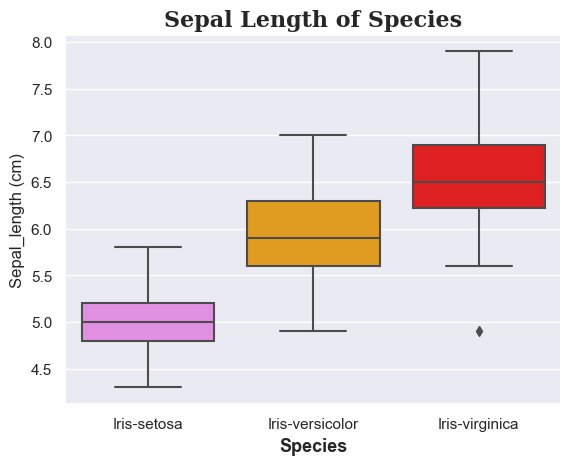

In [21]:
#  Visualizes the distribution of Sepal length of the Species
colors = ['violet', 'orange', 'red']
sn.boxplot(y= 'sepal_length', x= 'species', data= iris_project,
            palette= colors)
mplt.xlabel('Species', fontdict={'size': 13, 'weight': 'bold'})
mplt.ylabel('Sepal_length (cm)')
mplt.title('Sepal Length of Species',
fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
mplt.show()

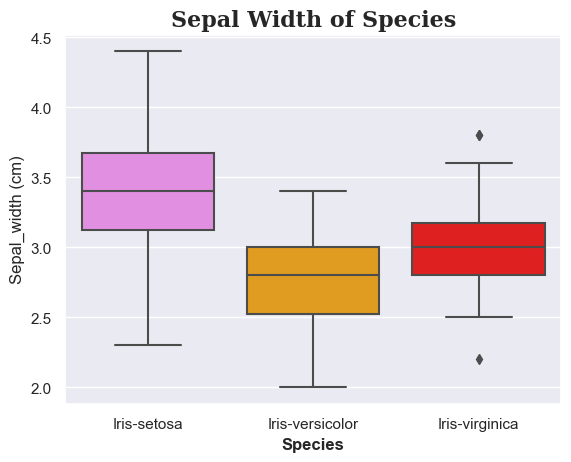

In [22]:
#  Visualizes the distribution of Sepal width of the Species
colors = ['violet', 'orange', 'red']
sn.boxplot(data=iris_project, x='species', y='sepal_width', palette=colors)
mplt.xlabel('Species', fontdict={'weight': 'bold'})
mplt.ylabel('Sepal_width (cm)')
mplt.title('Sepal Width of Species',
           fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
mplt.show()

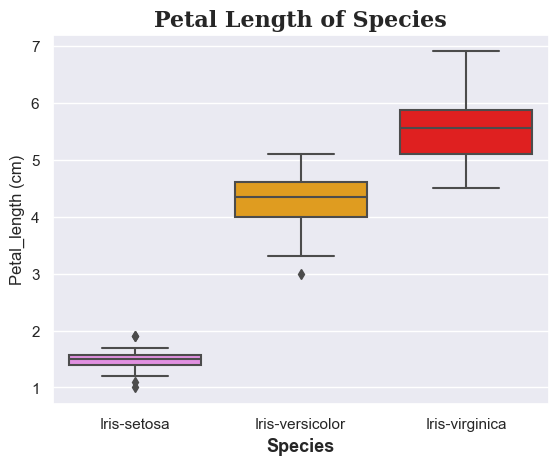

In [23]:
#  Visualizes the distribution of Petal length of the Species
colors = ['violet', 'orange', 'red']
sn.boxplot(y= 'petal_length', x= 'species', data= iris_project,
            palette= colors)
mplt.xlabel('Species', fontdict={'size': 13, 'weight': 'bold'})
mplt.ylabel('Petal_length (cm)')
mplt.title('Petal Length of Species',
           fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
mplt.show()

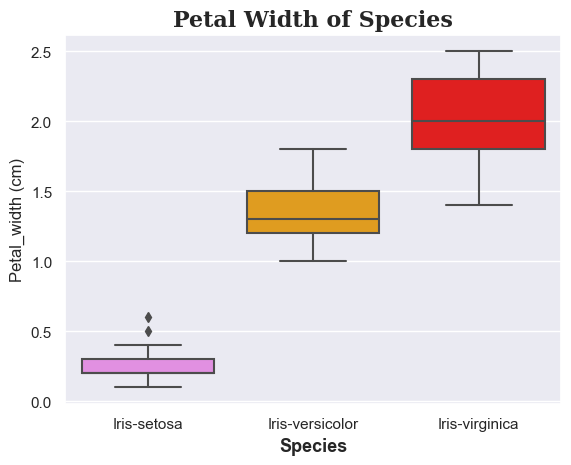

In [24]:
#  Visualizes the distribution of Petal width of the Species
colors = ['violet', 'orange', 'red']
sn.boxplot(y= 'petal_width', x= 'species', data= iris_project,
            palette= colors)
mplt.xlabel('Species', fontdict={'size': 13, 'weight': 'bold'})
mplt.ylabel('Petal_width (cm)')
mplt.title('Petal Width of Species',
           fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
mplt.show()

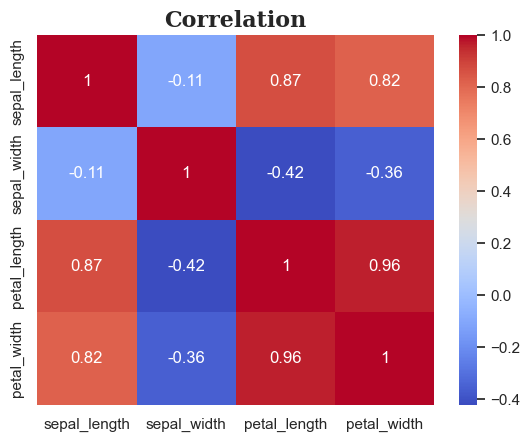

In [25]:
# Correlation of the features
corr = iris_project.select_dtypes('number').corr()
sn.heatmap(corr, annot= True, cmap= 'coolwarm')
mplt.title('Correlation', fontdict={'family': 'serif',
 'size': 16, 'weight': 'bold'})
mplt.show()

## Data Preprocessing

In [26]:
# Review the species column
iris_project['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [27]:
iris_project

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Modelling

In [28]:
X = iris_project.drop('species', axis= 1)
y = iris_project['species']

In [29]:
# Reviews the feature columns for the Variable X
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
# Reviews the target Variable y
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

## Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Splitting into Train Set

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    train_size=0.8, 
                                                    random_state= 52)

In [34]:
# Prints the shape of the train sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


# Importing Predictive Models 

In [35]:
# Imports several machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Model 1 (Random Forest Classifier)

In [36]:
# Assings algoritmn to a new variable
rfc_model = RandomForestClassifier()

In [37]:
# Fits the Model
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
# X train Prediction
X_train_prediction = rfc_model.predict(X_train)
#X_train_prediction

In [39]:
# X test Prediction
X_test_prediction = rfc_model.predict(X_test)

## Evaluation of Model 1

In [40]:
# Test accuracy score of the RFC X_train prediction
rfc_accuracy_score = accuracy_score(y_train, X_train_prediction) * 100

print('RFC accuracy score for X_train Prediction:', end=' ')
print(rfc_accuracy_score.round(2))


RFC accuracy score for X_train Prediction: 100.0


In [41]:
# Tests the accuracy score of the RFC X_test prediction
rfc_accuracy_score = accuracy_score(y_test, X_test_prediction) * 100

print('RFC accuracy score for X_test Prediction:', end=' ')
print(rfc_accuracy_score.round(2))

RFC accuracy score for X_test Prediction: 96.67


## Model 2 (KNeighbors Classifier)

In [42]:
# Assings algoritmn to a new variable
kn_model = KNeighborsClassifier()

In [43]:
# Fit the KNC model
kn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
kn_Xtrain_prediction = kn_model.predict(X_train)

In [45]:
kn_Xtest_prediction = kn_model.predict(X_test)

### Evaluation of Model 2 (KNeighbors Classifier)

In [46]:
kn_accuracy_score = accuracy_score(y_train, kn_Xtrain_prediction) * 100

print('KNC accuracy_score for X_train Prediction:', end=' ')
print(kn_accuracy_score.round(2))

KNC accuracy_score for X_train Prediction: 95.83


In [47]:
kn_accuracy_score = accuracy_score(y_test, kn_Xtest_prediction)*100

print('KNC accuracy score for X_test Prediction:', end=' ')
print(kn_accuracy_score.round(2))

KNC accuracy score for X_test Prediction: 96.67


## Model 3 (Logistic Regression)

In [48]:
log_reg_model = LogisticRegression()

In [49]:
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [50]:
logreg_Xtrain_prediction = log_reg_model.predict(X_train)

In [51]:
logreg_Xtest_prediction = log_reg_model.predict(X_test)

### Evaluation of Model 3

In [52]:
Logreg_accuracy_score = accuracy_score(y_train, logreg_Xtrain_prediction) * 100
print('Logreg accuracy_score for X_train Prediction:', end=' ')
print(Logreg_accuracy_score.round(2))

Logreg accuracy_score for X_train Prediction: 97.5


In [53]:
Logreg_accuracy_score = accuracy_score(y_test, logreg_Xtest_prediction) * 100
print('Logreg accuracy_score for X_test Prediction:', end=' ')
print(Logreg_accuracy_score.round(2))

Logreg accuracy_score for X_test Prediction: 96.67


### Evaluation Using Other Metrics

In [54]:
# import dependencies
from sklearn.metrics import f1_score, precision_score, recall_score

In [55]:
# Evaluating the model using other metrics
f1 = f1_score(y_test, kn_Xtest_prediction, average='weighted')*100
precision = precision_score(y_test, kn_Xtest_prediction, 
                              average='weighted')*100
recall = recall_score(y_test, kn_Xtest_prediction, average='weighted')*100

print('f1_score:', f1.round(2))
print('precision score:', precision.round(2))
print('recall score:', recall.round(2))

f1_score: 96.63
precision score: 96.89
recall score: 96.67


## Classification of Metrics Report

The 'classification_report' function provides a summary of the recall score, f1_score, precision, and support for each class. To view the report properly, print as a file.

In [56]:
# import classification_report
from sklearn.metrics import classification_report
c_report = classification_report

In [57]:
# Classification report
c_report = classification_report(y_test, kn_Xtest_prediction)
c_report

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00         7\nIris-versicolor       1.00      0.89      0.94         9\n Iris-virginica       0.93      1.00      0.97        14\n\n       accuracy                           0.97        30\n      macro avg       0.98      0.96      0.97        30\n   weighted avg       0.97      0.97      0.97        30\n'

In [58]:
# Print classification report as a file, and view in a text editor
with open('classification_report.txt', 'w') as report_file:
    report_file.write(c_report)

## Confusion Matrix on Model Evaluation

In [59]:
# imports the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, kn_Xtest_prediction)
cm

array([[ 7,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 14]], dtype=int64)

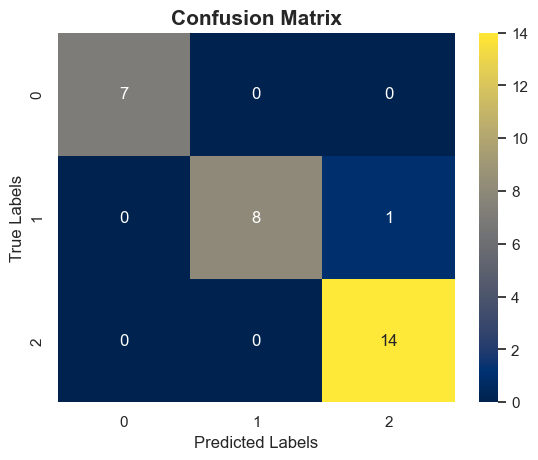

In [60]:
# Plots the confusion matrix
sn.heatmap(cm, annot=True, fmt='d', cmap='cividis')
mplt.xlabel('Predicted Labels')
mplt.ylabel('True Labels')
mplt.title('Confusion Matrix', fontdict= {'size':15, 'weight':'bold'})
mplt.show()

# Model Validation

In [61]:
# Cross-validation
num_folds = 10
kf = KFold(n_splits= num_folds, shuffle=True, random_state= 52)

In [62]:
scores = cross_val_score(rfc_model, X, y, cv=kf, scoring= 'accuracy')
average_accuracy = scores.mean() * 100

print("Average accuracy score for cross validation:", end=' ') 
print(average_accuracy.round(2))

# Note this value might not be stable

Average accuracy score for cross validation: 95.33
